Import the necessary libraries

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Read the images in BGR and greyscale

In [2]:
image = cv2.imread("rick.png")
image_grey = cv2.imread("rick.png", 0)

We can try to show the image using cv2 here... But it causes a few minor annoynaces. So, we will make use of matplotlib's pyplot module to show the images.

In [4]:
cv2.imshow("Rick", image_grey)
cv2.waitKey()

27

Here the figure() is used to get a figure of size 15x15. In this space, we plot 3 images. 

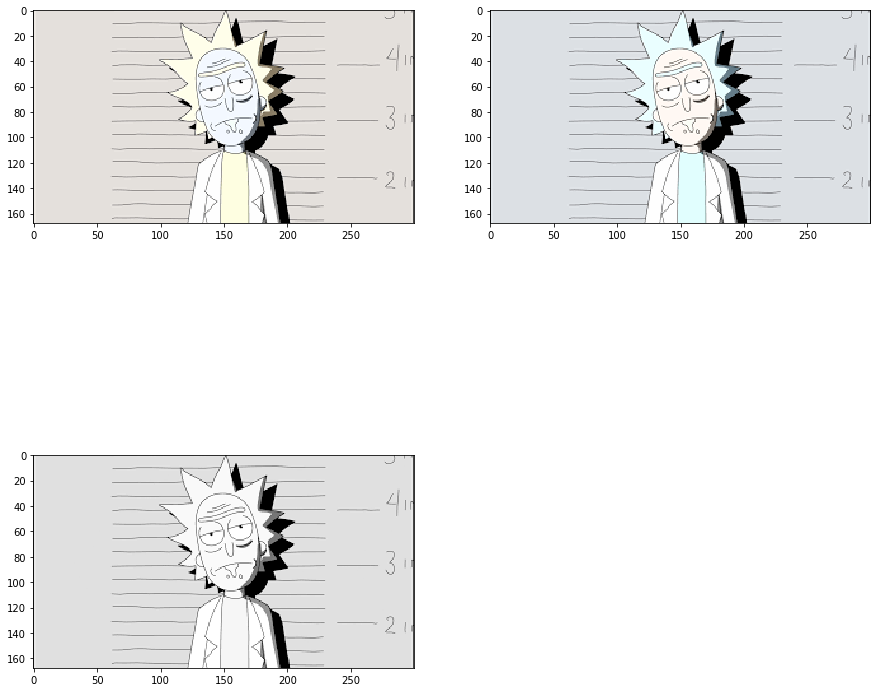

In [7]:
fig = plt.figure(figsize=(15, 15))

rows = 2
cols = 2

fig.add_subplot(rows, cols, 1)
# plt.axis("off")
plt.imshow(image)

fig.add_subplot(rows, cols, 2)
# plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, cols, 3)
# plt.axis("off")
plt.imshow(image_grey, cmap=cm.gray)


Show histogram of greyscale images.

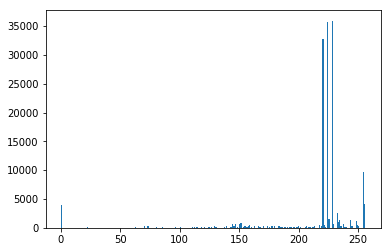

In [9]:
plt.hist(image.ravel(),256,[0,256])
plt.show()

Use a tuple of values to enumerate and plot the blue, green and red pixels in the image

In [9]:
color = ('b','g','r')

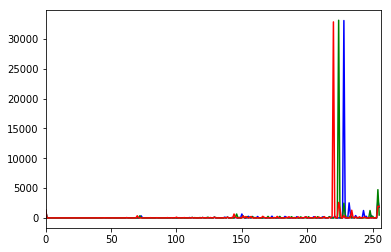

In [16]:
for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

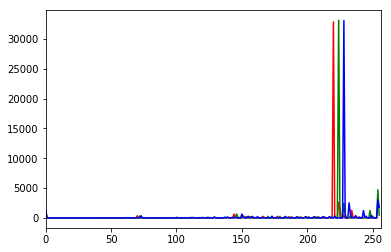

In [10]:
# Remove reversed to see changes.
for i, col in enumerate(reversed(color)): 
    histr = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_BGR2RGB)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()

Apply a mask to an image and plot the histogram of that image.

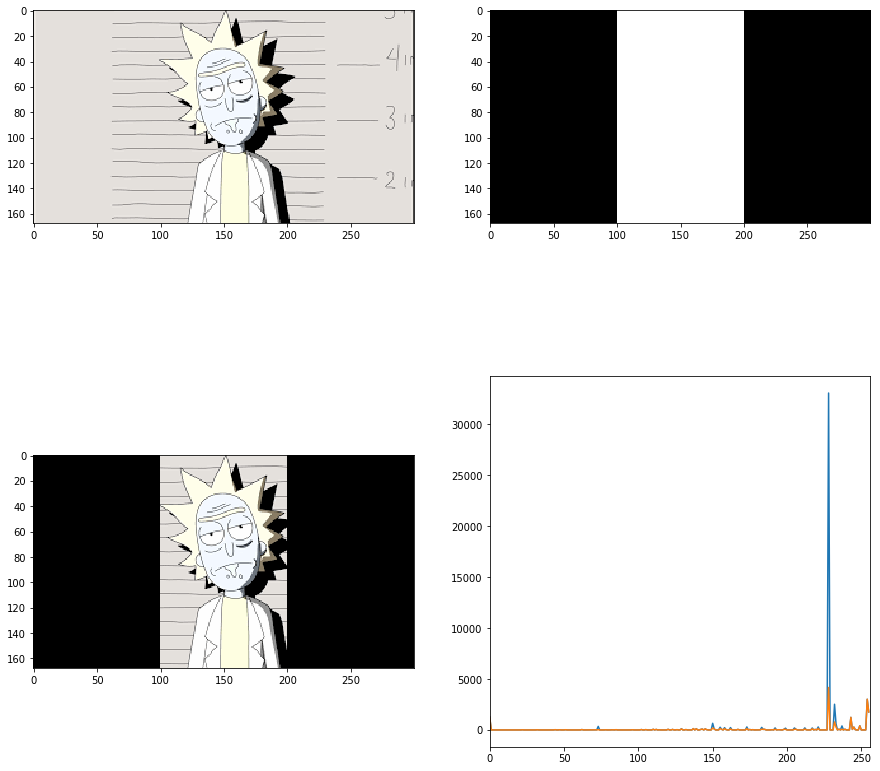

In [25]:
# Create a mask
mask = np.zeros(image.shape[:2], np.uint8)
mask[0:400, 100:200] = 255
masked_img = cv2.bitwise_and(image,image,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([image],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([image],[0],mask,[256],[0,256])

fig = plt.figure(figsize=(15, 15))
plt.subplot(221), plt.imshow(image, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()